# Say Realz Assignment Model 2 ~ SKLearn Neural Network MLPRegressor

Done by: Zhen Xuan, Shavonne, Kevin

Dataset from UCI Machine Learning Repository: **"Bike Sharing Dataset Data Set"**

Compilation of Dataset: *Hadi Fanaee-T*  

Source: https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset (requires Login)


# Problem Statement:

The problem statement for this dataset is to predict the total number of bikes rented based on the available information. Our goal is to predict the number of bikes rented per hour based on weather and time-related features, to help bike-sharing companies improve bike availability and optimize pricing strategies.
 
This would be a regression problem, and the learning outcome would be to build a model that can accurately predict the number of bikes rented on a given day, which can help bike-sharing companies optimize their inventory and resources.

---

### Essential Libraries

> NumPy : Library for Numeric Computations in Python  
> Pandas : Library for Data Acquisition and Preparation  
> Matplotlib : Low-level library for Data Visualization  
> Seaborn : Higher-level library for Data Visualization  

In [1]:
%matplotlib inline
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

---

## Import the Dataset

Importing Dataset for Bike Sharing from "new_hour.csv"

In [2]:
bike_data_hour = pd.read_csv('new_hour.csv')
bike_data_hour.head()

,temp,humidity,is_peak_hour,season_Spring,year_2011,year_2012,hour_1,hour_2,hour_3,hour_4,hour_5,hour_17,hour_18,total_count
0,0.24,0.81,1,1,1,0,0,0,0,0,0,0,0,4.361876
1,0.22,0.80,1,1,1,0,1,0,0,0,0,0,0,6.827897
2,0.22,0.80,1,1,1,0,0,1,0,0,0,0,0,6.162337
3,0.24,0.75,1,1,1,0,0,0,1,0,0,0,0,3.892645
4,0.24,0.75,1,1,1,0,0,0,0,1,0,0,0,0.000000


## Notebook Outline
1.1. Reason for Choosing MLP

1.2. Introduction to MLP Neural Network  

1.3. Training of MLP Model

1.4. Hyperparameters 


## 1.1. Reason for Choosing MLP

Neural networks take all possible heuristics that can be used for our forecasts, before working out the best possible combination for every forecast based on recent demand history. It is an efficient method for solving regression problems because of its ability to learn complex nonlinear relationships between response variables and its predictor variable.

In particular, MLP provides a high degree of accuracy when handling complex, non-linear datasets. The MLP model implements an algorithm for training and testing data sets using backpropagation and stochastic gradient descent method to adjust the weights between neurons in order to improve prediction accuracy. It includes several parameters that can be used to fine-tune the model’s performance including number of hidden layers, activation functions, solvers (for optimization), etc.  

Additionally, one advantage of MLP over other regression algorithms is its ability to handle data with large numbers of features/inputs. While other regression models may struggle with datasets containing hundreds or thousands of features, MLP Regressor can quickly learn the patterns and provide accurate predictions, making it ideal for demand forecasting. 

Lastly, MLP also performs feature selection automatically through its training process, eliminating irrelevant or redundant features from further consideration in the model building process. This makes it easier to identify the most important predictors without having to manually eliminate them from the dataset which can be quite time consuming when dealing with large numbers of input variables.


## 1.2. Introduction to MLP Neural Network  

### 1.2.1. Introduction to Neural Networks 

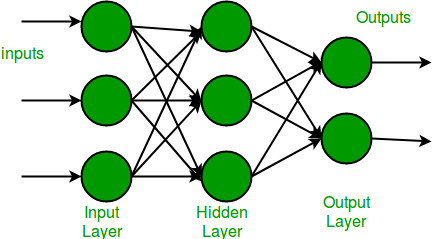

Neural network is a machine learning algorithm that takes in inputs from one layer and produces outputs on another layer. Neural network models learn by adjusting their weights and biases over time to reduce errors in their outputs when compared to expected results. This process is known as training, or backpropagation.

They consist of a network of “neurons” organised in layers, where neurons in between these layers represent weights—the strength of the connection between each neuron—and biases—the threshold value for activating each neuron. Predictors form the bottom layer and coefficients attached to predictors are called “weights”. Weights are selected in the neural network framework using a “learning algorithm” that minimises a “cost function” such as the MSE. 


### 1.2.2. Introduction to MLP

Multilayer Perceptron (MLP) is a type of artificial neural network (ANN) regression model, with the simplest model being at least three layers of nodes – input layer, hidden layer and output layer.

In MLP, it is very important to scale the data used for training the model. The independent train and test datasets are further scaled to make sure that the input data is standard normally distributed and are centred around zero and have variance in the same order. This allows the MLP to train iteratively – at each time step the partial derivatives of the loss function with respect to the model parameters are computed to update the parameters. Additionally, you can also have a regularisation term added to the loss function that shrinks model parameters to prevent overfitting.

In our MLP model, we use “Adam” which is the default optimiser which can manage a pretty large dataset. In addition to “RELU” activation, MLPRegressor supports the “sigmoid” and “hyperbolic tan” function. 

Same as that of the Ridge Regression model, our input variables are the predictor variables while the output variable is a scaled version of our response variable `total_count`.


In [3]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score, mean_squared_log_error
import statsmodels.formula.api as smf
#from statsmodels.stats.outliers_influence import variance_inflation_factor
from yellowbrick.regressor import PredictionError, ResidualsPlot
import pickle

Similar to that of Model 1, we:
1. isolate the total count variable
2. split the train and test dataset 
3. set up the default parameters of the model.

In [4]:
X = bike_data_hour.drop(['total_count'], axis=1)
y = bike_data_hour['total_count']


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Model 2.1
This model is the base model with the default parameters and no hypertuning.

In [6]:
regr = MLPRegressor(random_state=1, max_iter=500,alpha=1)
regr.fit(X_train, y_train)


MLPRegressor(alpha=1, max_iter=500, random_state=1)

In [7]:
regr.get_params(deep=True)

{'activation': 'relu',
 'alpha': 1,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (100,),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 500,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': 1,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

In [8]:
# Coefficients of the Ridge Regression line
print('Coefficients \t: a = ', regr.coefs_)
print('Intercept \t: b = ', regr.intercepts_)
print('Loss \t: a = ', regr.loss_)
#print('Validation Scores \t: b = ', regr.validation_scores_)

Coefficients 	: a =  [array([[ 0.11463664,  0.31611745,  0.08911745, ...,  0.22312704,
         0.08238289,  0.20120521],
       [-0.03080701,  0.26965713,  0.04741557, ..., -0.06355442,
        -0.01251963,  0.0975702 ],
       [ 0.02907696, -0.00530796,  0.0511601 , ..., -0.12222548,
         0.01633243, -0.08348594],
       ...,
       [-0.05973444,  0.07675882, -0.06752906, ..., -0.10837013,
        -0.05651079, -0.10423761],
       [ 0.051775  , -0.00970916,  0.05805017, ...,  0.08997506,
         0.04916678,  0.09051781],
       [ 0.0367878 , -0.02575937,  0.04240861, ...,  0.06942192,
         0.03458039,  0.06387877]]), array([[ 2.77785630e-001],
       [-4.77315674e-001],
       [ 3.08614201e-001],
       [ 4.66817290e-001],
       [ 3.88663827e-001],
       [ 4.87433233e-001],
       [ 5.04612956e-001],
       [-1.54578216e+000],
       [-6.93834885e-001],
       [-2.54033163e-001],
       [ 8.90621465e-001],
       [-5.53696551e-001],
       [ 4.62637418e-001],
       [ 5.68

In [9]:
y_train_pred = regr.predict(X_train)

r2 = regr.score(X_train, y_train)
mse = mean_squared_error(y_train, y_train_pred)

#Goodness Fit for Train Dataset
print("Explained Variance (R^2) - Train Set \t\t:", r2)
print("Mean Squared Error (MSE) - Train Set \t\t:", mse)
rmse = np.sqrt(mse)
print('Root Mean Squared Error(RMSE) - Train Set\t:', rmse)

# rmsle = np.sqrt(mean_squared_log_error(y_train, y_train_pred))
# print('Root Mean Squared Log Error(RMSLE):', rmsle)

Explained Variance (R^2) - Train Set 		: 0.8099070475546267
Mean Squared Error (MSE) - Train Set 		: 5.5068240042018575
Root Mean Squared Error(RMSE) - Train Set	: 2.3466623114973015


In [10]:
y_test_pred = regr.predict(X_test)

r2 = regr.score(X_test, y_test)
mse = mean_squared_error(y_test, y_test_pred)

#Goodness Fit for Train Dataset
print("Explained Variance (R^2) - Test Set \t\t:", r2)
print("Mean Squared Error (MSE) - Test Set \t\t:", mse)
rmse = np.sqrt(mse)
print('Root Mean Squared Error(RMSE) - Test Set\t:', rmse)

# rmsle = np.sqrt(mean_squared_log_error(y_train, y_train_pred))
# print('Root Mean Squared Log Error(RMSLE):', rmsle)

Explained Variance (R^2) - Test Set 		: 0.8035296159153171
Mean Squared Error (MSE) - Test Set 		: 5.576792329265685
Root Mean Squared Error(RMSE) - Test Set	: 2.3615233069494965


c:\Users\Kevin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


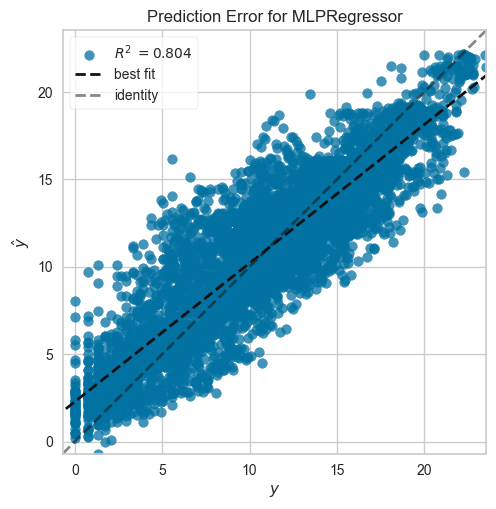

<AxesSubplot: title={'center': 'Prediction Error for MLPRegressor'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [11]:
visualizer = PredictionError(regr)
visualizer.fit(X_train, y_train)  
visualizer.score(X_test, y_test)  
visualizer.poof()

c:\Users\Kevin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


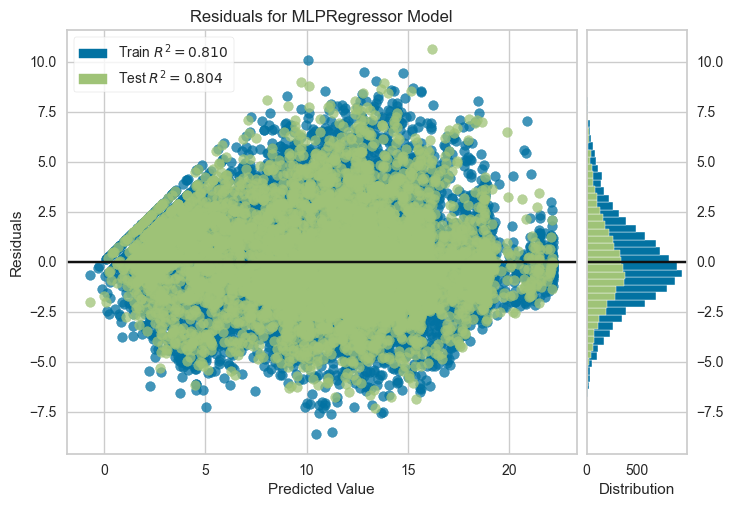

<AxesSubplot: title={'center': 'Residuals for MLPRegressor Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [12]:
visualizer = ResidualsPlot(regr)
visualizer.fit(X_train, y_train)  
visualizer.score(X_test, y_test)  
visualizer.poof()

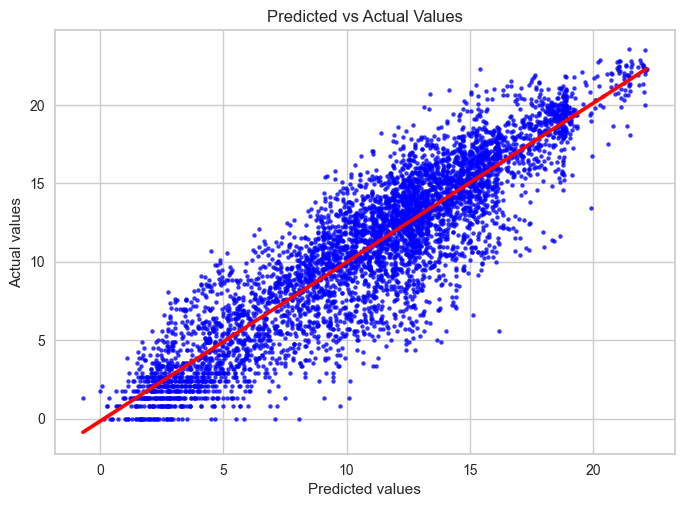

In [13]:
# Create scatter plot of predicted vs actual values
#plt.scatter(inv_test_predictions, inv_y_test)
sb.regplot(y=y_test, x=y_test_pred,scatter_kws={"color": "blue","s":10}, line_kws={"color": "red"})
plt.xlabel("Predicted values")
plt.ylabel("Actual values")
plt.title("Predicted vs Actual Values")
plt.show()

On top part is before we revert the values

Below part is we reverted the values

In [14]:
hour_data = pd.read_csv("hour.csv")

In [15]:
import scipy.stats as stats
from scipy.special import inv_boxcox

# perform box-cox transformation on total_count variable
bc_trans, bc_lambda = stats.boxcox(hour_data['cnt'])

# print the lambda value
print(bc_lambda)

# replace the total_count variable with the box-cox transformed values
# bike_data_hour['total_count'] = bc_trans

# invert the box-cox transformation to get back to the original scale
predicted_scale_normal = inv_boxcox(y_test_pred, bc_lambda)
original_scale_normal = inv_boxcox(y_test, bc_lambda)


# print the original scale values
print("Predicted Values (Back to Original Scale):\n", predicted_scale_normal)
print("Original Values (Back to Original Scale):\n", original_scale_normal)

0.305430867537719
Predicted Values (Back to Original Scale):
 [315.33315723  85.55609234  13.22005538 ... 521.54935027 168.71159914
 117.46876506]
Original Values (Back to Original Scale):
 12830    425.0
8688      88.0
7091       4.0
12230    526.0
431       13.0
         ...  
12749    167.0
11476    214.0
12847    556.0
16721    312.0
9511      72.0
Name: total_count, Length: 5214, dtype: float64


In [16]:
mse = mean_squared_error(original_scale_normal, predicted_scale_normal)

# Accuracy of Predicted vs Actual
print("Mean Squared Error (MSE) - Predicted vs Actual (Back to Scale) \t\t:", mse)
rmse = np.sqrt(mse)
print('Root Mean Squared Error(RMSE) - Predicted vs Actual (Back to Scale) \t:', rmse)

# rmsle = np.sqrt(mean_squared_log_error(y_train, y_train_pred))
# print('Root Mean Squared Log Error(RMSLE):', rmsle)

Mean Squared Error (MSE) - Predicted vs Actual (Back to Scale) 		: 7252.934726013013
Root Mean Squared Error(RMSE) - Predicted vs Actual (Back to Scale) 	: 85.16416339055421


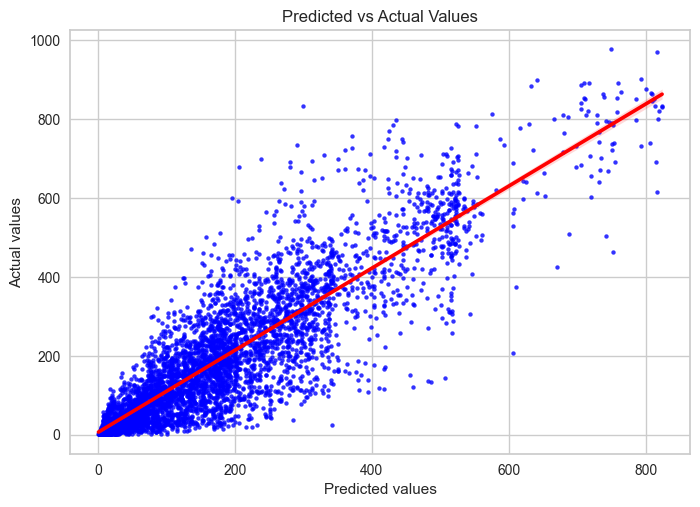

In [17]:
# Create scatter plot of predicted vs actual values
#plt.scatter(inv_test_predictions, inv_y_test)
sb.regplot(y=original_scale_normal, x=predicted_scale_normal,scatter_kws={"color": "blue","s":10}, line_kws={"color": "red"})
plt.xlabel("Predicted values")
plt.ylabel("Actual values")
plt.title("Predicted vs Actual Values")
plt.show()

#### Cross Validation for Model 2.1

To show that it is not over-fitted and our model is accurate throughtout

### Hypertuning

In [18]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score


k_folds = KFold(n_splits=5, shuffle=True, random_state=1)

mlp_scores = cross_val_score(regr, X, y, cv=k_folds)

print("Ridge Score for Each Cross Validation Iteration: ",mlp_scores)
print("Average K-Fold Score: ",np.mean(mlp_scores))

Ridge Score for Each Cross Validation Iteration:  [0.81185665 0.80841429 0.81141166 0.79270024 0.8010166 ]
Average K-Fold Score:  0.8050798864467419


#### Footnote: Aborted Attempt at Hypertuning 

We tried to find the best parameter through GridSearch for hypertuning.

In [19]:
# from sklearn.model_selection import GridSearchCV

# # Define the parameter grid to search over
# param_grid = {
#     'hidden_layer_sizes': [(50,), (100,), (200,)],
#     'activation': ['relu', 'tanh'],
#     'solver': ['adam', 'lbfgs'],
#     'alpha': np.logspace(np.log10(0.1), np.log10(1000), 10),
#     'learning_rate': ['constant', 'adaptive'],
#     'learning_rate_init': [0.001, 0.01, 0.1],
#     'max_iter': [100, 250, 500],
#     'tol': [1e-3, 1e-4, 1e-5]
# }

# # Create a MLPRegressor object
# regr = MLPRegressor(random_state=1)

# # Perform grid search to find the best hyperparameters
# grid_search = GridSearchCV(estimator=regr, param_grid=param_grid, cv=5, n_jobs=-1)
# grid_search.fit(X_train, y_train)

# # Print the best hyperparameters
# print("Best hyperparameters: ", grid_search.best_params_)


In the end, we decide to abandon the GridSearch function as it too long to run. We will try RandomSearch :(.

#### Hypertuning: RandomSearch

In [20]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform

# Define the parameter grid to search over
param_dist = {
    'hidden_layer_sizes': [(50,), (100,), (200,)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'lbfgs'],
    'alpha': sp_uniform(loc=0.1, scale=999.9),
    'learning_rate': ['constant', 'adaptive'],
    'learning_rate_init': sp_uniform(loc=0.001, scale=0.099),
    'tol': sp_uniform(loc=1e-5, scale=0.001)
}

# Create a MLPRegressor object
regr = MLPRegressor(random_state=1,max_iter=500)

# Perform randomized search to find the best hyperparameters
random_search = RandomizedSearchCV(estimator=regr, param_distributions=param_dist, n_iter=100, cv=5, n_jobs=-1)
random_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best hyperparameters: ", random_search.best_params_)


Best hyperparameters:  {'activation': 'tanh', 'alpha': 7.760743574017968, 'hidden_layer_sizes': (200,), 'learning_rate': 'constant', 'learning_rate_init': 0.00948842375044123, 'solver': 'lbfgs', 'tol': 0.0003008386523225142}


c:\Users\Kevin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


### Model 2.2

We apply the MLP model with hypertuning, using RandomSearch.

In [21]:
# Create a new MLPRegressor object with the best hyperparameters
regr = MLPRegressor(hidden_layer_sizes=(100,), activation='relu', solver='lbfgs', alpha=4.222403059659622, learning_rate='constant', learning_rate_init=0.05887330457329267, max_iter=500, tol=0.0007082465313555877, random_state=42)

# Fit the new MLPRegressor object to the training data
regr.fit(X_train, y_train)

# Use the new MLPRegressor object to make predictions on the test data
y_pred = regr.predict(X_test)


c:\Users\Kevin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [22]:
regr.get_params(deep=True)

{'activation': 'relu',
 'alpha': 4.222403059659622,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (100,),
 'learning_rate': 'constant',
 'learning_rate_init': 0.05887330457329267,
 'max_fun': 15000,
 'max_iter': 500,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': 42,
 'shuffle': True,
 'solver': 'lbfgs',
 'tol': 0.0007082465313555877,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

In [23]:
# Coefficients of the Ridge Regression line
print('Coefficients \t: a = ', regr.coefs_)
print('Intercept \t: b = ', regr.intercepts_)
print('Loss \t: a = ', regr.loss_)
#print('Validation Scores \t: b = ', regr.validation_scores_)

Coefficients 	: a =  [array([[-0.01829657, -0.08877155,  1.23038066, ..., -0.01051794,
        -0.21427714,  0.12825222],
       [-0.06833451,  0.07210351, -0.45427118, ...,  0.21526474,
        -0.19916994,  1.58260354],
       [ 0.02071333,  0.03718114, -0.29715142, ..., -0.0420282 ,
        -0.28630911, -0.18528463],
       ...,
       [-0.04591897, -0.04055955, -0.11221253, ..., -0.0457286 ,
         0.070498  , -0.52996519],
       [-0.06448248,  0.12187772,  0.34125597, ...,  0.13114985,
         0.03455003, -0.16229032],
       [ 0.03766408, -0.06123942, -0.2513235 , ..., -0.06301689,
         0.04300886,  0.27437973]]), array([[-0.05136094],
       [ 0.26718714],
       [-1.39599699],
       [ 1.68042797],
       [ 0.46394192],
       [-2.22951574],
       [-0.17181328],
       [ 0.94163803],
       [ 0.0779031 ],
       [ 0.9879351 ],
       [-0.04638898],
       [ 0.04557158],
       [-1.72717997],
       [ 0.04013156],
       [-1.19831655],
       [ 0.02922747],
       [ 0.0

In [24]:
y_train_pred = regr.predict(X_train)

r2 = regr.score(X_train, y_train)
mse = mean_squared_error(y_train, y_train_pred)

#Goodness Fit for Train Dataset
print("Explained Variance (R^2) - Train Set \t\t:", r2)
print("Mean Squared Error (MSE) - Train Set \t\t:", mse)
rmse = np.sqrt(mse)
print('Root Mean Squared Error(RMSE) - Train Set\t:', rmse)

# rmsle = np.sqrt(mean_squared_log_error(y_train, y_train_pred))
# print('Root Mean Squared Log Error(RMSLE):', rmsle)

Explained Variance (R^2) - Train Set 		: 0.8164360758865531
Mean Squared Error (MSE) - Train Set 		: 5.317683852082339
Root Mean Squared Error(RMSE) - Train Set	: 2.3060103755365757


In [25]:
y_test_pred = regr.predict(X_test)

r2 = regr.score(X_test, y_test)
mse = mean_squared_error(y_test, y_test_pred)

#Goodness Fit for Train Dataset
print("Explained Variance (R^2) - Test Set \t\t:", r2)
print("Mean Squared Error (MSE) - Test Set \t\t:", mse)
rmse = np.sqrt(mse)
print('Root Mean Squared Error(RMSE) - Test Set\t:', rmse)

# rmsle = np.sqrt(mean_squared_log_error(y_train, y_train_pred))
# print('Root Mean Squared Log Error(RMSLE):', rmsle)

Explained Variance (R^2) - Test Set 		: 0.805624932661011
Mean Squared Error (MSE) - Test Set 		: 5.51731697164776
Root Mean Squared Error(RMSE) - Test Set	: 2.3488969691426993


c:\Users\Kevin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


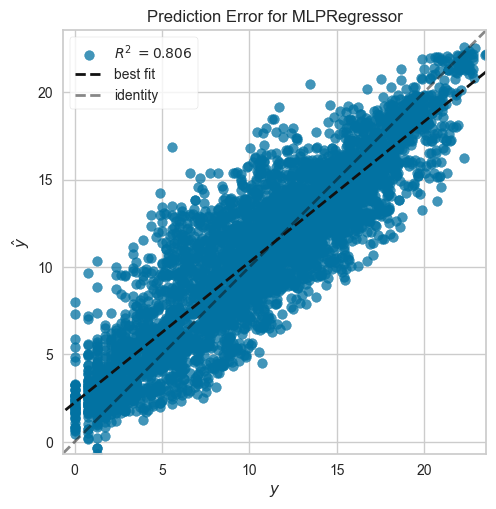

<AxesSubplot: title={'center': 'Prediction Error for MLPRegressor'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [26]:
visualizer = PredictionError(regr)
visualizer.fit(X_train, y_train)  
visualizer.score(X_test, y_test)  
visualizer.poof()

c:\Users\Kevin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


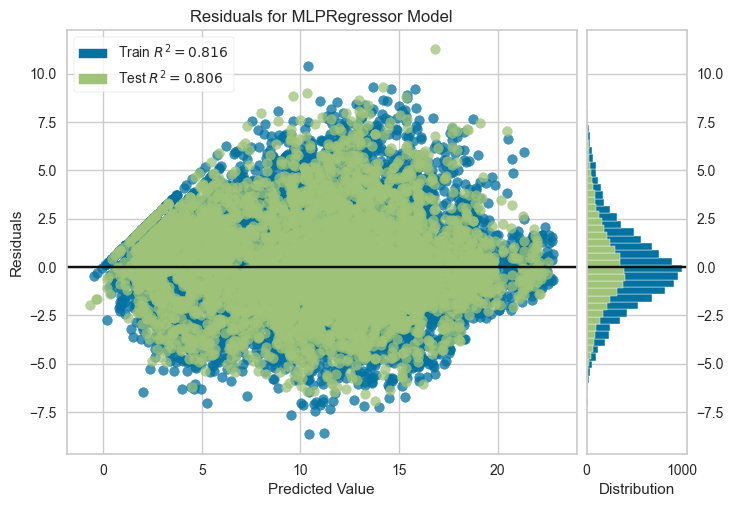

<AxesSubplot: title={'center': 'Residuals for MLPRegressor Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [27]:
visualizer = ResidualsPlot(regr)
visualizer.fit(X_train, y_train)  
visualizer.score(X_test, y_test)  
visualizer.poof()

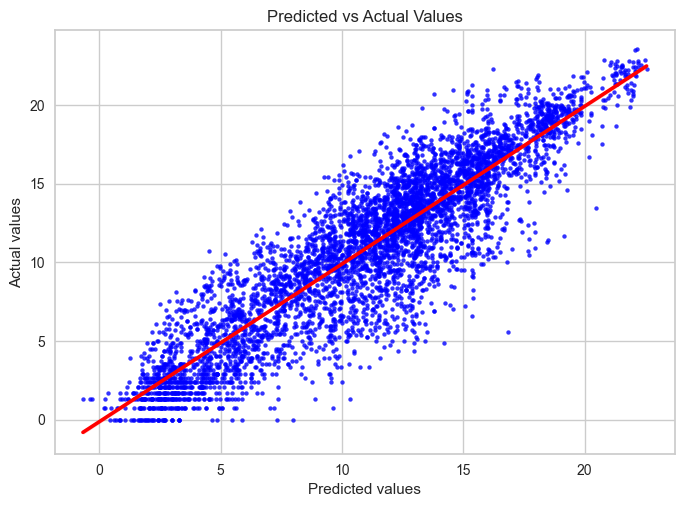

In [28]:
# Create scatter plot of predicted vs actual values
#plt.scatter(inv_test_predictions, inv_y_test)
sb.regplot(y=y_test, x=y_test_pred,scatter_kws={"color": "blue","s":10}, line_kws={"color": "red"})
plt.xlabel("Predicted values")
plt.ylabel("Actual values")
plt.title("Predicted vs Actual Values")
plt.show()

On top part is before we revert the values

Below part is we reverted the values

In [29]:
hour_data = pd.read_csv("hour.csv")

In [30]:
import scipy.stats as stats
from scipy.special import inv_boxcox

# perform box-cox transformation on total_count variable
bc_trans, bc_lambda = stats.boxcox(hour_data['cnt'])

# print the lambda value
print(bc_lambda)

# replace the total_count variable with the box-cox transformed values
# bike_data_hour['total_count'] = bc_trans

# invert the box-cox transformation to get back to the original scale
predicted_scale_normal = inv_boxcox(y_test_pred, bc_lambda)
original_scale_normal = inv_boxcox(y_test, bc_lambda)


# print the original scale values
print("Predicted Values (Back to Original Scale):\n", predicted_scale_normal)
print("Original Values (Back to Original Scale):\n", original_scale_normal)

0.305430867537719
Predicted Values (Back to Original Scale):
 [327.65509749  85.84492014  14.08876302 ... 524.99995392 174.60271612
 118.45501146]
Original Values (Back to Original Scale):
 12830    425.0
8688      88.0
7091       4.0
12230    526.0
431       13.0
         ...  
12749    167.0
11476    214.0
12847    556.0
16721    312.0
9511      72.0
Name: total_count, Length: 5214, dtype: float64


In [31]:
mse = mean_squared_error(original_scale_normal, predicted_scale_normal)

# Accuracy of Predicted vs Actual
print("Mean Squared Error (MSE) - Predicted vs Actual (Back to Scale) \t\t:", mse)
rmse = np.sqrt(mse)
print('Root Mean Squared Error(RMSE) - Predicted vs Actual (Back to Scale) \t:', rmse)

# rmsle = np.sqrt(mean_squared_log_error(y_train, y_train_pred))
# print('Root Mean Squared Log Error(RMSLE):', rmsle)

Mean Squared Error (MSE) - Predicted vs Actual (Back to Scale) 		: 6942.999351049469
Root Mean Squared Error(RMSE) - Predicted vs Actual (Back to Scale) 	: 83.32466232184484


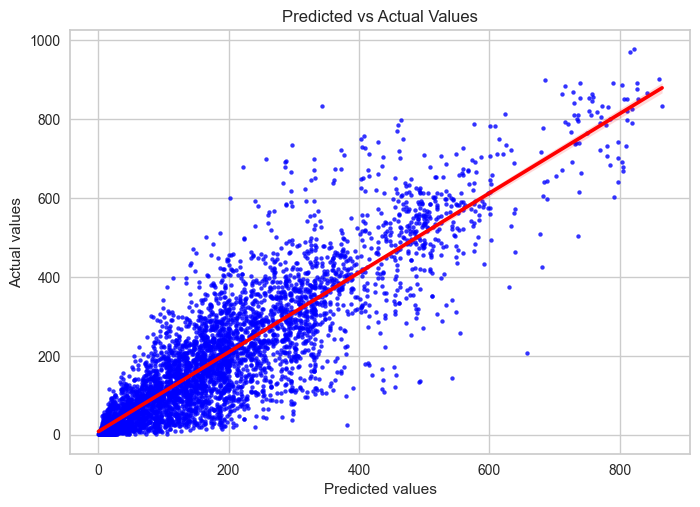

In [32]:
# Create scatter plot of predicted vs actual values
#plt.scatter(inv_test_predictions, inv_y_test)
sb.regplot(y=original_scale_normal, x=predicted_scale_normal,scatter_kws={"color": "blue","s":10}, line_kws={"color": "red"})
plt.xlabel("Predicted values")
plt.ylabel("Actual values")
plt.title("Predicted vs Actual Values")
plt.show()

#### Cross Validation for Model 2.2

To show that it is not over-fitted and our model is accurate throughtout

In [33]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score


k_folds = KFold(n_splits=5, shuffle=True, random_state=1)

mlp_scores = cross_val_score(regr, X, y, cv=k_folds)



c:\Users\Kevin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\Kevin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\Kevin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptr

In [34]:
print("Ridge Score for Each Cross Validation Iteration: ",mlp_scores)
print("Average K-Fold Score: ",np.mean(mlp_scores))

Ridge Score for Each Cross Validation Iteration:  [0.81629879 0.81575774 0.81502402 0.79976377 0.80470245]
Average K-Fold Score:  0.8103093547170183


### Model 2.3 

Siunce MLP does not have a top 10 feature importance, we use the same top 10 features identified from the Ridge Regression Model.

In [35]:
X_train.drop(['year_2011', 'year_2012', 'season_Spring'], axis=1, inplace=True)
X_test.drop(['year_2011', 'year_2012', 'season_Spring'], axis=1, inplace=True)

In [36]:
regr.fit(X_train, y_train)


c:\Users\Kevin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPRegressor(alpha=4.222403059659622, learning_rate_init=0.05887330457329267,
             max_iter=500, random_state=42, solver='lbfgs',
             tol=0.0007082465313555877)

In [37]:
# Coefficients of the MLP Regression line
print('Coefficients \t: a = ', regr.coefs_)
print('Intercept \t: b = ', regr.intercepts_)
print('Loss \t: a = ', regr.loss_)
#print('Validation Scores \t: b = ', regr.validation_scores_)

Coefficients 	: a =  [array([[-1.18154201e-02,  1.44640356e-01,  2.35129989e-01,
         3.98686668e-02,  4.76552105e-02, -1.44943124e-01,
        -4.50298518e-01,  6.32429248e-01,  9.52269627e-03,
         1.10542644e+00, -4.89979098e-02,  1.53665541e-01,
         4.81348182e-01, -7.83831304e-02,  4.56855715e-02,
         5.68016188e-02, -6.18052465e-01,  1.71210563e-01,
        -1.33830201e-01,  2.39849271e-01, -9.84009390e-03,
        -2.63760788e-02,  1.14817195e-01,  9.92044854e-02,
         6.58660310e-02,  5.63150637e-02, -6.78946940e-02,
         7.54212841e-02, -1.43385953e-01, -6.20074087e-02,
         6.33423830e-03, -2.21363655e+00, -1.08672670e-01,
         2.00703287e-01,  1.02303896e-01, -8.13159713e-03,
         3.75519062e-02,  1.59781832e-02,  1.73504915e-02,
         9.02608074e-02,  8.42949290e-02, -1.85756852e-01,
        -1.10003660e-01,  4.07452010e-01, -5.26914807e-02,
         6.88595167e-02, -2.09753282e-02, -1.02744568e+00,
         8.27946554e-01, -2.999327

In [38]:
y_train_pred = regr.predict(X_train)

r2 = regr.score(X_train, y_train)
mse = mean_squared_error(y_train, y_train_pred)

#Goodness Fit for Train Dataset
print("Explained Variance (R^2) - Train Set \t\t:", r2)
print("Mean Squared Error (MSE) - Train Set \t\t:", mse)
rmse = np.sqrt(mse)
print('Root Mean Squared Error(RMSE) - Train Set\t:', rmse)

# rmsle = np.sqrt(mean_squared_log_error(y_train, y_train_pred))
# print('Root Mean Squared Log Error(RMSLE):', rmsle)

Explained Variance (R^2) - Train Set 		: 0.774714192790711
Mean Squared Error (MSE) - Train Set 		: 6.526329750718226
Root Mean Squared Error(RMSE) - Train Set	: 2.554668227132092


In [39]:
y_test_pred = regr.predict(X_test)

r2 = regr.score(X_test, y_test)
mse = mean_squared_error(y_test, y_test_pred)

#Goodness Fit for Train Dataset
print("Explained Variance (R^2) - Test Set \t\t:", r2)
print("Mean Squared Error (MSE) - Test Set \t\t:", mse)
rmse = np.sqrt(mse)
print('Root Mean Squared Error(RMSE) - Test Set\t:', rmse)

# rmsle = np.sqrt(mean_squared_log_error(y_train, y_train_pred))
# print('Root Mean Squared Log Error(RMSLE):', rmsle)

Explained Variance (R^2) - Test Set 		: 0.7715574578018303
Mean Squared Error (MSE) - Test Set 		: 6.484318860289876
Root Mean Squared Error(RMSE) - Test Set	: 2.546432575249122
